In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt

import random
import math
import numpy as np

T = 20
dt = 0.1
N = round(T/dt)
t = np.linspace(0, T, N)
X0 = 50
cash0 = 1000
S0 = 100


# initialize securities number and price for each step
X = [X0] * N
cash = [cash0] * N
S = S0 + np.cos(np.arange(0, T, dt))

# traders list
traders = []

# create traders class
class RandomTrader:
    def __init__(self, stock, cash):
        self.X = stock.copy()
        self.cash = cash.copy()
    
    def random_trade(self):
        return np.random.randint(-2, 3)

    def trade(self, num_steps):
        for i in range(1, num_steps):
            self.X[i] = self.X[i - 1] + self.random_trade()
            
    def show_stock(self):
        return self.X
    
class TrendFollower:
    def __init__(self, stock, cash):
        self.X = stock.copy()
        self.cash = cash.copy()
        self.min_leverage = 0.001
        self.max_leverage = 8
    
    def trend_following_trade(self, S, current_step):
        if current_step <= 3:
            return 0
        mean = sum(S[current_step - 4:current_step - 1])/3
        if S[current_step - 1] < mean:
            return self.sell(S, current_step)
        elif S[current_step - 1] > mean:
            return self.buy(S, current_step)
        else:
            return 0
        
    def buy(self, S, current_step):
        totalValue = X[current_step - 1] * S[current_step - 1] + cash[current_step - 1]
        return np.floor((self.max_leverage / (self.max_leverage + 1)) * totalValue / S[current_step - 1]) - self.X[current_step - 1]
    
    def sell(self, S, current_step):
        totalValue = X[current_step - 1] * S[current_step - 1] + cash[current_step - 1]
        return np.ceil((self.min_leverage / (self.min_leverage + 1)) * totalValue / S[current_step - 1]) - self.X[current_step - 1]

    def trade(self, S, current_step):
        self.X[current_step] = self.X[current_step - 1] + self.trend_following_trade(S, current_step)
        self.cash[current_step] = self.cash[current_step - 1] - self.trend_following_trade(S, current_step) * S[current_step - 1]
            
    def show_stock(self):
        return self.X
    
    def show_cash(self):
        return self.cash
    
    def show_value(self, S):
        return [x * s + c for x, s, c in zip(self.X, S, self.cash)]
    
class MeanAversion:
    def __init__(self, stock, cash):
        self.X = stock.copy()
        self.cash = cash.copy()
        
    def mean_aversion_trade(self, S, current_step):
        if current_step <= 3:
            return 0
        mean = sum(S[current_step - 4:current_step - 1])/3
        if S[current_step - 1] > mean:
            return np.random.randint(-2, 0)
        elif S[current_step - 1] < mean:
            return np.random.randint(1, 3)
        else:
            return 0
        
    def trade(self, S, current_step):
        self.X[current_step] = self.X[current_step - 1] + self.mean_aversion_trade(S, current_step)
            
    def show_stock(self):
        return self.X

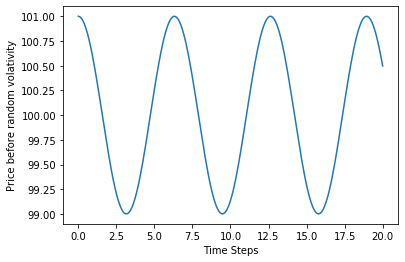

In [2]:
plt.plot(t, S)
plt.xlabel('Time Steps')
plt.ylabel('Price before random volativity')
plt.show()

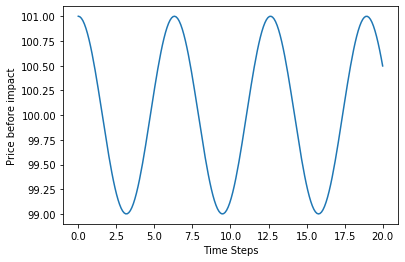

In [3]:
## independent random variable in volativity
xi = np.insert(np.random.normal(0, 1.0, N - 1), 0, 0.0)

## price dynamics
# volativity factors
def volativity_factor(volativity, xi):
    return volativity * xi

volativity = 0

S =[S[i] + volativity_factor(volativity, xi[i]) for i in range(N)]

plt.plot(t, S)
plt.xlabel('Time Steps')
plt.ylabel('Price before impact')
plt.show()

In [4]:
## add trader
# traders list
traders[:] = []
traders

for i in range(1):
    traders.append(TrendFollower(X, cash))

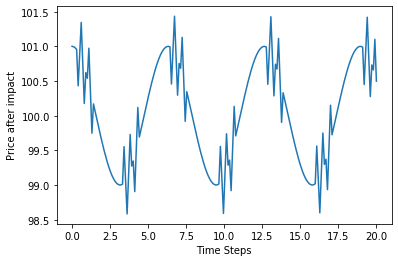

In [5]:
# impact
def permanent_impact(n, gamma):
    return gamma * n

def temporary_impact(n, epsilon, eta):
    return epsilon * np.sign(n) + eta * n

gamma = 0.01
epsilon = 0.1
eta = 0.1

# market price with a random trader and a trend follower
S_temp = S.copy()

n = np.zeros(np.shape(X))
step = 0
for i in range(N):
    step = step + 1
    for trader in traders:
        trader.trade(S_temp, i)
        n[i] += trader.show_stock()[i - 1] - trader.show_stock()[i]
    S_temp[i] = S_temp[i] - permanent_impact(n[i], gamma)
        
plt.plot(t, S_temp)
plt.xlabel('Time Steps')
plt.ylabel('Price after impact')
plt.show()

In [6]:
X = traders[0].show_stock()
cash = traders[0].show_cash()
value = traders[0].show_value(S_temp)

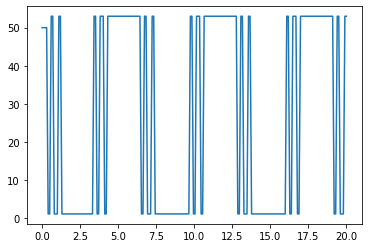

In [7]:
plt.plot(t, X)
plt.show()

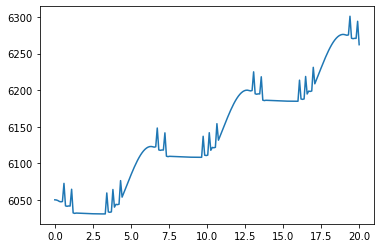

In [8]:
plt.plot(t, value)
plt.show()

In [9]:
value

[6050.0,
 6046.346222748608,
 6052.38421227434,
 6048.931597677407,
 6048.51292741927,
 6048.764636807176,
 6048.801743852868,
 6077.210632200271,
 6044.301318033715,
 6043.7712478510675,
 6043.982956203193,
 6043.955045081711,
 6043.86075254668,
 6043.786622844745,
 6043.79122690678,
 6043.470301694038,
 6043.368395511755,
 6043.379111664378,
 6043.261805010888,
 6043.233839415441,
 6043.179682340988,
 6043.155871861792,
 6043.1906359468485,
 6058.885600910223,
 6016.89762769103,
 6016.493841738225,
 6016.877288114427,
 6016.741397997645,
 6016.907109484999,
 6038.756992422577,
 6018.976436503706,
 6018.188492838961,
 6018.61426688975,
 6018.912686206605,
 6042.899106043547,
 6008.32267443428,
 6008.015935166218,
 6008.632691709332,
 6031.82419220482,
 6011.961340273535,
 6017.965614453125,
 6025.736034103131,
 6028.497812230726,
 6027.6988524346925,
 6032.0752752228655,
 6032.504241460894,
 6046.198912995993,
 6041.154509837203,
 6048.245317849017,
 6057.196139698166,
 6058.690842279

In [10]:
S_temp

[101.0,
 101.06003265786947,
 101.0645096894944,
 100.99557701433407,
 101.97355925765633,
 99.56429339773557,
 101.9652474341218,
 99.71951707046446,
 102.11479273989377,
 99.41664340989342,
 101.82660782965466,
 99.3175881931576,
 101.67310869554916,
 98.94584119624692,
 101.49286849906099,
 98.68391958407915,
 101.06270332196986,
 98.68657049259102,
 100.84068495426774,
 98.54051433805026,
 100.75165635386122,
 98.16385691904642,
 100.5610294701794,
 98.16487399889492,
 100.41677594992527,
 98.02037683772917,
 100.39465828908362,
 98.11089078373003,
 100.36503544200559,
 97.74331481043242,
 100.24399418834814,
 97.61869863337648,
 100.17986512738395,
 97.70274877164032,
 100.31286929697765,
 97.83772197108924,
 100.2284629383185,
 97.8245911002441,
 100.60729465580236,
 98.19935224567189,
 100.56702420683787,
 98.23490449801041,
 100.64039243330788,
 98.49521250497806,
 100.8689125100685,
 98.52210515802344,
 100.9528777040676,
 98.8099442606017,
 101.50030437599474,
 98.85849935863

In [11]:
n

array([  0.,   0.,   0.,   0., -10.,  13., -12.,  12., -12.,  12., -12.,
        12., -12.,  12., -12.,  12., -12.,  12., -12.,  12., -12.,  12.,
       -12.,  12., -12.,  12., -12.,  12., -12.,  12., -12.,  12., -12.,
        12., -12.,  12., -12.,  12., -12.,  12., -12.,  12., -12.,  12.,
       -12.,  12., -12.,  12., -12.,  12., -12.,  12., -12.,  12., -12.,
        12., -12.,  12., -12.,  12., -12.,  12., -12.,  12., -12.,  12.,
       -12.,  12., -12.,  12., -12.,  12., -12.,  12., -12.,  12., -12.,
        12., -12.,  12., -12.,  12., -12.,  12., -12.,  12., -12.,  12.,
       -12.,  12., -12.,  12., -12.,  12., -12.,  12., -12.,  12., -12.,
        12.])